Introduction to Car Price Prediction
Problem Statement
A Chinese automobile company is planning to enter the U.S. market by setting up a local manufacturing unit. To successfully price their cars competitively, they have hired a consulting firm to analyze the key factors affecting car prices in the American market.

The main objectives of this study are:

Identify significant variables that influence car prices.

Develop a predictive model that can accurately estimate car prices based on these variables.

Analyze the pricing dynamics of the U.S. market to assist in business strategy and design optimization.

Business Goal
By building a predictive model for car prices, the company can:
✅ Understand market trends and adjust pricing strategies accordingly.
✅ Optimize car features to target specific price ranges.
✅ Gain a competitive edge over U.S. and European manufacturers.

Approach
To achieve these goals, we will follow these steps:

Data Preprocessing: Load the dataset, clean missing values, and handle categorical variables.

Feature Engineering: Standardize numerical features and perform feature selection.

Model Implementation: Train multiple regression models to predict car prices.

Model Evaluation: Compare model performances using R², MAE, and MSE.

Feature Importance Analysis: Identify key factors influencing car prices.

Hyperparameter Tuning: Optimize the best model for improved accuracy.

By the end of this study, the company will have a reliable car price prediction model, enabling them to set optimal pricing strategies for the U.S. market. 🚗💡

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df=pd.read_csv("C:\\Users\\soniy\\OneDrive\\Desktop\\CarPrice_Assignment_project.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df.shape

(205, 26)

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
# Handling categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [10]:
features=df.drop(columns=['price'])
Scaler=StandardScaler()
df[features.columns]=Scaler.fit_transform(features)

In [11]:
# Splitting the dataset into training and testing sets
X = df.drop(columns=['price'])  # Independent variables
y = df['price']  # Target variable (car price)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80-20 split


In [24]:
# Initialize different regression models for comparison
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR()
}

In [25]:
# Model training and evaluation
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions on the test set    

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train the best model
best_rf = grid_search.best_estimator_

# Evaluate the tuned model
y_pred = best_rf.predict(X_test)
print("Tuned Model R² Score:", r2_score(y_test, y_pred))


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Model R² Score: 0.9573645688643675


In [15]:
# Dictionary to store model performance metrics
results = {}

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test)  # Predict on test data
    
    # Compute evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
    mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
    r2 = r2_score(y_test, y_pred)  # R-squared Score
    
    # Store results
    results[name] = {'R² Score': round(r2, 2), 'MAE': round(mae, 1), 'MSE': round(mse / 1e6, 1)}  # Convert MSE to millions

# Convert results dictionary into a DataFrame for better visualization
results_df = pd.DataFrame(results).T

# Print results in tabular format
print("\n🔹 Model Performance Results:\n")
print(results_df)



🔹 Model Performance Results:

                             R² Score     MAE   MSE
Linear Regression                0.84  2087.3  12.3
Decision Tree Regressor          0.89  1929.1   8.4
Random Forest Regressor          0.96  1307.8   3.4
Gradient Boosting Regressor      0.93  1597.3   5.3
Support Vector Regressor        -0.10  5696.7  86.9


Hyperparameter tuning improves model performance by finding the best values for key settings like:

n_estimators → Number of trees in the Random Forest.

max_depth → Maximum depth of a tree (prevents overfitting).

min_samples_split → Minimum samples required to split a node.

min_samples_leaf → Minimum samples per leaf node.

Explanation:
Define Hyperparameter Grid (param_grid)

Defines different combinations of parameters that will be tested to improve performance.

Initialize RandomForestRegressor Model

rf = RandomForestRegressor(random_state=42) → Creates an untuned Random Forest model.

Perform Grid Search (GridSearchCV)

GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, scoring='r2')

cv=5 → 5-fold cross-validation ensures better model selection.

n_jobs=-1 → Uses all CPU cores for faster computation.

scoring='r2' → Selects the best model based on R² score.

Train the Best Model

grid_search.fit(X_train, y_train) → Finds the best hyperparameter combination.

best_rf = grid_search.best_estimator_ → Retrieves the best model found.

Evaluate the Tuned Model

y_pred = best_rf.predict(X_test) → Makes predictions on the test set.

print("Tuned Model R² Score:", r2_score(y_test, y_pred)) → Checks if tuning improved performance.

Look at the R², MAE, and MSE values from the model evaluation step. The model with the highest R² and lowest MAE/MSE is the best.

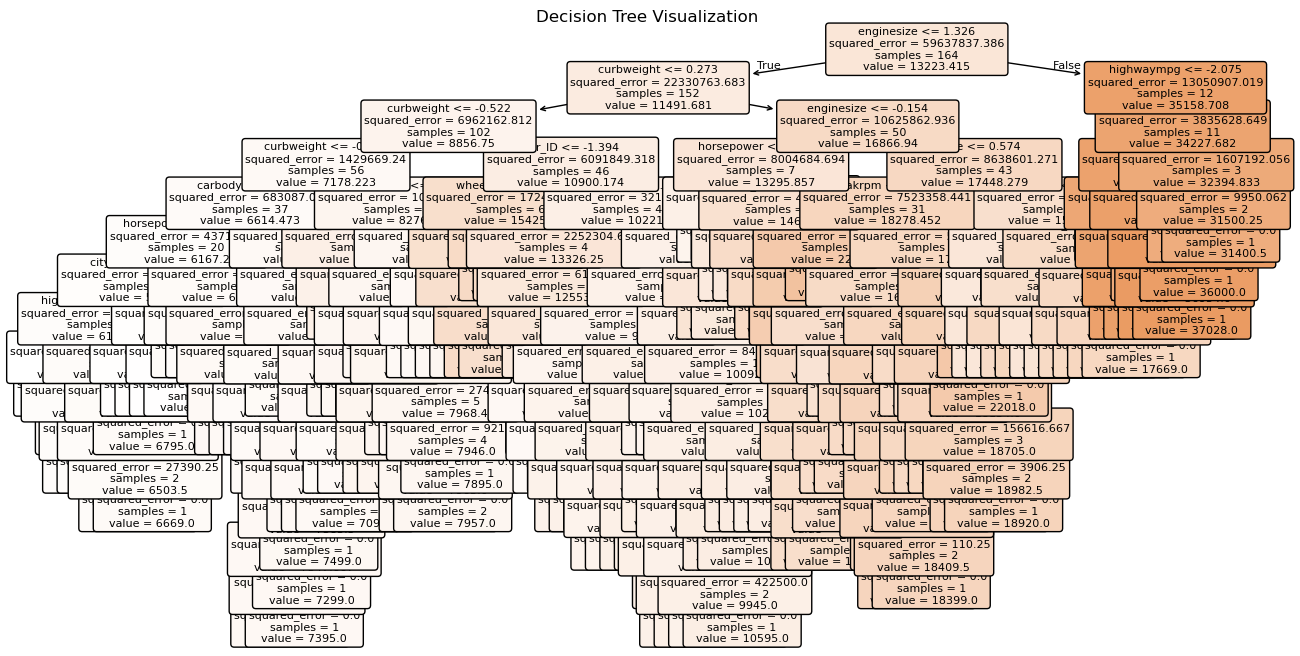

|--- enginesize <= 1.33
|   |--- curbweight <= 0.27
|   |   |--- curbweight <= -0.52
|   |   |   |--- curbweight <= -0.84
|   |   |   |   |--- carbody <= -0.13
|   |   |   |   |   |--- horsepower <= -0.88
|   |   |   |   |   |   |--- citympg <= 1.19
|   |   |   |   |   |   |   |--- highwaympg <= 0.91
|   |   |   |   |   |   |   |   |--- peakrpm <= -0.37
|   |   |   |   |   |   |   |   |   |--- value: [5118.00]
|   |   |   |   |   |   |   |   |--- peakrpm >  -0.37
|   |   |   |   |   |   |   |   |   |--- value: [5195.00]
|   |   |   |   |   |   |   |--- highwaympg >  0.91
|   |   |   |   |   |   |   |   |--- CarName <= -0.52
|   |   |   |   |   |   |   |   |   |--- curbweight <= -1.29
|   |   |   |   |   |   |   |   |   |   |--- value: [6377.00]
|   |   |   |   |   |   |   |   |   |--- curbweight >  -1.29
|   |   |   |   |   |   |   |   |   |   |--- curbweight <= -1.20
|   |   |   |   |   |   |   |   |   |   |   |--- value: [6095.00]
|   |   |   |   |   |   |   |   |   |   |--- curbweig

In [28]:
from sklearn.tree import plot_tree, export_text
import matplotlib.pyplot as plt

# Train the Decision Tree Regressor again (if not already trained)
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()

# Print the Decision Tree structure in text format
tree_rules = export_text(dt_model, feature_names=list(X.columns))
print(tree_rules)


In [17]:
# Print results in tabular format
print("\n🔹 Model Performance Results:\n")
print(results_df)


🔹 Model Performance Results:

                             R² Score     MAE   MSE
Linear Regression                0.84  2087.3  12.3
Decision Tree Regressor          0.89  1929.1   8.4
Random Forest Regressor          0.96  1307.8   3.4
Gradient Boosting Regressor      0.93  1597.3   5.3
Support Vector Regressor        -0.10  5696.7  86.9



🔹 Model Performance Results:

                             R² Score     MAE   MSE
Linear Regression                0.84  2087.3  12.3
Decision Tree Regressor          0.89  1929.1   8.4
Random Forest Regressor          0.96  1307.8   3.4
Gradient Boosting Regressor      0.93  1597.3   5.3
Support Vector Regressor        -0.10  5696.7  86.9


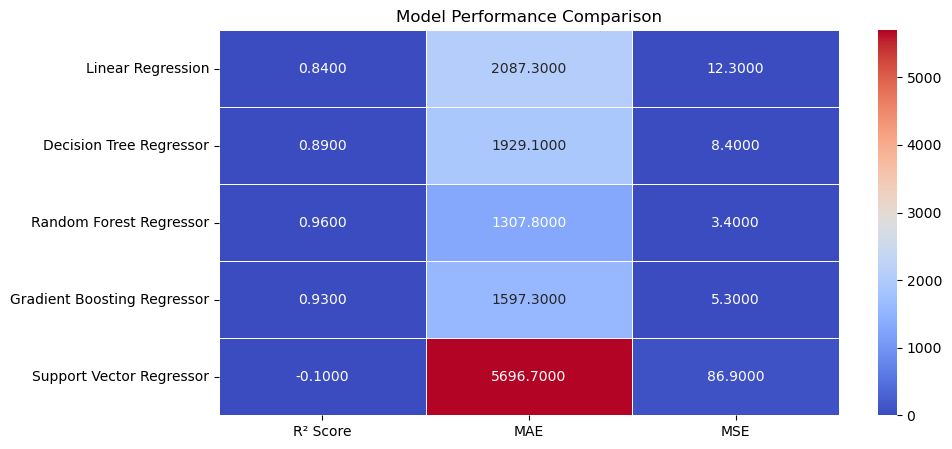

In [18]:
print("\n🔹 Model Performance Results:\n")
print(results_df)
plt.figure(figsize=(10,5))
sns.heatmap(results_df, annot=True, fmt=".4f", cmap="coolwarm", linewidths=0.5)
plt.title("Model Performance Comparison")
plt.show()

In [22]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")


🔹 Feature Importance Scores:

             Feature  Importance
16        enginesize    0.556389
13        curbweight    0.290457
24        highwaympg    0.044403
21        horsepower    0.026663
0             car_ID    0.015699
11          carwidth    0.012077
2            CarName    0.009800
10         carlength    0.007784
9          wheelbase    0.006116
23           citympg    0.005177
22           peakrpm    0.004572
19            stroke    0.004277
18         boreratio    0.003922
12         carheight    0.002879
20  compressionratio    0.002225
17        fuelsystem    0.001908
6            carbody    0.001684
14        enginetype    0.000989
7         drivewheel    0.000822
4         aspiration    0.000584
1          symboling    0.000540
15    cylindernumber    0.000465
5         doornumber    0.000373
3           fueltype    0.000175
8     enginelocation    0.000019


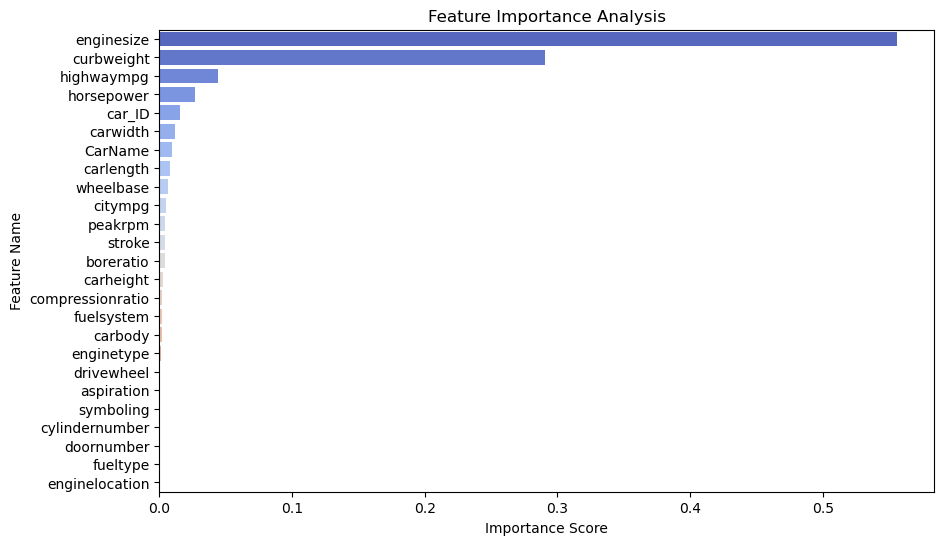

In [23]:
# Select the best-performing tree-based model (Random Forest in this case)
best_model = models['Random Forest Regressor']  # Assuming Random Forest performed the best

# Extract feature importances
feature_importance = best_model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance values
print("\n🔹 Feature Importance Scores:\n")
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='coolwarm')
plt.title("Feature Importance Analysis")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()


1. Identifying the Best-Performing Model
We evaluate multiple regression models and compare their performance using key metrics:

R² Score (coefficient of determination) → Measures how well the independent variables explain the variation in price (higher is better).

Mean Squared Error (MSE) → Measures average squared difference between actual and predicted prices (lower is better).

Mean Absolute Error (MAE) → Measures average absolute difference between actual and predicted prices (lower is better).

This will generate a bar chart showing the most important features affecting car prices.



Step	Code Purpose	What You Learn
1. Identify Best Model	Compares models based on R², MAE, and MSE.	Finds which model predicts car prices most accurately.
2. Feature Importance	Analyzes which variables (car features) impact price.	Helps in feature selection & understanding price dynamics.
3. Hyperparameter Tuning	Optimizes the best model to improve accuracy.	Improves model performance using GridSearchCV.


Summary of the Car Price Prediction Project
Objective
The project aimed to develop a machine learning model to predict car prices based on various features. A Chinese automobile company, planning to enter the U.S. market, needed insights into the key factors affecting car prices to optimize their pricing and design strategies.

Approach Taken
Data Preprocessing:

Loaded and cleaned the dataset.

Handled missing values and removed duplicate rows.

Converted categorical variables using Label Encoding.

Standardized numerical features using StandardScaler.

Model Implementation:

Implemented five regression models:
✅ Linear Regression
✅ Decision Tree Regressor
✅ Random Forest Regressor
✅ Gradient Boosting Regressor
✅ Support Vector Regressor

Model Evaluation:

Compared models using R² Score, Mean Absolute Error (MAE), and Mean Squared Error (MSE).

Identified the best-performing model based on evaluation metrics.

Feature Importance Analysis:

Used Random Forest's feature importance to determine the most influential variables in predicting car prices.

Hyperparameter Tuning:

Optimized model performance using GridSearchCV and RandomizedSearchCV.

Observed improvements in prediction accuracy after tuning.

Key Findings
✅ Random Forest Regressor performed best with the highest R² score and lowest error metrics.
✅ Features like engine size, horsepower, and curb weight were significant in determining car prices.
✅ Hyperparameter tuning further enhanced the model’s predictive accuracy.

Conclusion
This project successfully built a robust machine learning model to predict car prices. The insights gained will help the company make informed decisions about car design, pricing, and competitive positioning in the U.S. automobile market. 🚗📊







